<a href="https://colab.research.google.com/github/Sasidhar0709/Project-Stock-market-Analysis/blob/main/Project_Final_21063192.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install yfinance

In [ ]:
!pip install fancyimpute

In [ ]:
!pip install finta

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import yfinance as yf
from scipy.interpolate import interp1d
from scipy.stats import linregress
import warnings
warnings.filterwarnings('ignore')
from fancyimpute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from finta import TA

In [5]:
ftse100_tickers = [
    'BARC.L','LLOY.L', 'NWG.L', 'HSBA.L', 'STAN.L', 'PRU.L', 'PHNX.L',
    'AZN.L', 'CRDA.L','GSK.L','HIK.L', 'SN.L',
    'JD.L','MKS.L', 'NXT.L', 'SBRY.L', 'TSCO.L',
   ]

start_date = '2013-01-01'
end_date = '2023-12-31'

stocks_data = {}

for ticker in ftse100_tickers:
    print(f"Fetching data for {ticker}...")
    data = yf.download(ticker, start=start_date, end=end_date)
    stocks_data[ticker] = data

for ticker, data in stocks_data.items():
    data.to_csv(f'{ticker}_stock_data.csv')
    print(f"Data for {ticker} saved to {ticker}_stock_data.csv")


Fetching data for BARC.L...


[*********************100%%**********************]  1 of 1 completed


Fetching data for LLOY.L...


[*********************100%%**********************]  1 of 1 completed


Fetching data for NWG.L...


[*********************100%%**********************]  1 of 1 completed


Fetching data for HSBA.L...


[*********************100%%**********************]  1 of 1 completed


Fetching data for STAN.L...


[*********************100%%**********************]  1 of 1 completed


Fetching data for PRU.L...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Fetching data for PHNX.L...
Fetching data for AZN.L...


[*********************100%%**********************]  1 of 1 completed


Fetching data for CRDA.L...


[*********************100%%**********************]  1 of 1 completed


Fetching data for GSK.L...


[*********************100%%**********************]  1 of 1 completed


Fetching data for HIK.L...


[*********************100%%**********************]  1 of 1 completed


Fetching data for SN.L...


[*********************100%%**********************]  1 of 1 completed


Fetching data for JD.L...


[*********************100%%**********************]  1 of 1 completed


Fetching data for MKS.L...


[*********************100%%**********************]  1 of 1 completed


Fetching data for NXT.L...


[*********************100%%**********************]  1 of 1 completed


Fetching data for SBRY.L...


[*********************100%%**********************]  1 of 1 completed


Fetching data for TSCO.L...


[*********************100%%**********************]  1 of 1 completed


Data for BARC.L saved to BARC.L_stock_data.csv
Data for LLOY.L saved to LLOY.L_stock_data.csv
Data for NWG.L saved to NWG.L_stock_data.csv
Data for HSBA.L saved to HSBA.L_stock_data.csv
Data for STAN.L saved to STAN.L_stock_data.csv
Data for PRU.L saved to PRU.L_stock_data.csv
Data for PHNX.L saved to PHNX.L_stock_data.csv
Data for AZN.L saved to AZN.L_stock_data.csv
Data for CRDA.L saved to CRDA.L_stock_data.csv
Data for GSK.L saved to GSK.L_stock_data.csv
Data for HIK.L saved to HIK.L_stock_data.csv
Data for SN.L saved to SN.L_stock_data.csv
Data for JD.L saved to JD.L_stock_data.csv
Data for MKS.L saved to MKS.L_stock_data.csv
Data for NXT.L saved to NXT.L_stock_data.csv
Data for SBRY.L saved to SBRY.L_stock_data.csv
Data for TSCO.L saved to TSCO.L_stock_data.csv


In [44]:
company_name = {'BARC.L':'barclays','LLOY.L':'lloyds','NWG.L':'natwest',
                'HSBA.L':'hsbc','STAN.L':'stand_chartered','PRU.L':'prudential','PHNX.L':'phoenix'}

In [45]:
company_data = {}
for ticker, company in company_name.items():
    print(f"Reading data for {company} ({ticker})")
    try:
        df = pd.read_csv(f'{ticker}_stock_data.csv')
        company_data[company] = df
    except FileNotFoundError:
        print(f"File for {ticker} not found.")

Reading data for barclays (BARC.L)
Reading data for lloyds (LLOY.L)
Reading data for natwest (NWG.L)
Reading data for hsbc (HSBA.L)
Reading data for stand_chartered (STAN.L)
Reading data for prudential (PRU.L)
Reading data for phoenix (PHNX.L)


In [46]:
company_data['barclays'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2777 entries, 0 to 2776
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2777 non-null   object 
 1   Open       2777 non-null   float64
 2   High       2777 non-null   float64
 3   Low        2777 non-null   float64
 4   Close      2777 non-null   float64
 5   Adj Close  2777 non-null   float64
 6   Volume     2777 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 152.0+ KB


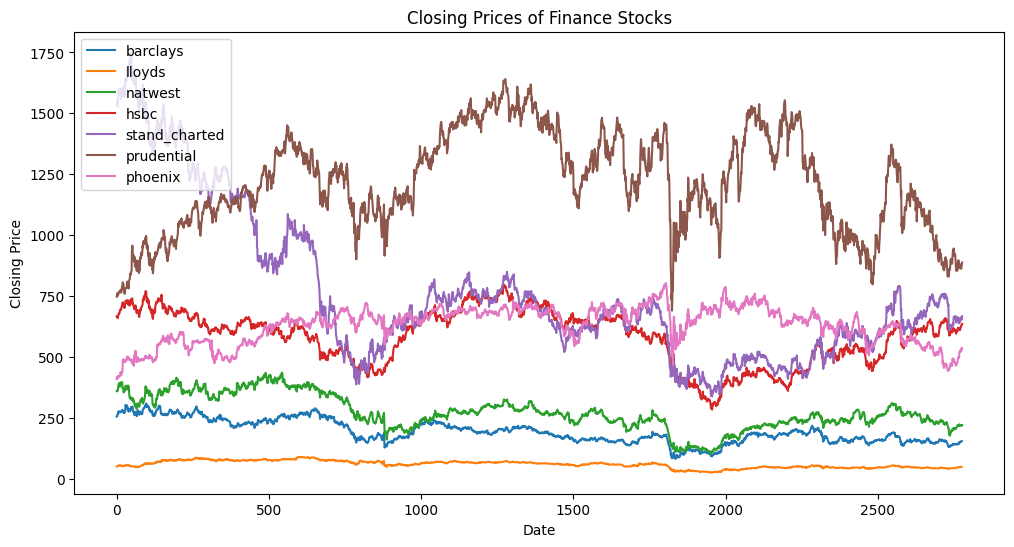

In [43]:
plt.figure(figsize=(12,6))
for company, values in company_data.items():
    plt.plot(values['Close'],label=company)

plt.title('Closing Prices of Finance Stocks')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='upper left')
plt.show()

In [51]:
for company, values in company_data.items():
  values['SMA_50'] = TA.SMA(values, 50)
  values['EMA_50'] = TA.EMA(values, 50)
  values['RSI_14'] = TA.RSI(values, 14)
  macd = TA.MACD(values)
  values['MACD'] = macd['MACD']
  values['MACD_SIGNAL'] = macd['SIGNAL']
  print(company)
  print(values.head())

barclays
         Date        Open        High         Low       Close   Adj Close  \
0  2013-01-02  252.043701  255.953903  249.041595  254.584000  186.024353   
1  2013-01-03  253.706497  257.622192  252.026199  254.953506  186.294342   
2  2013-01-04  254.168304  257.318298  252.644196  255.600204  186.766861   
3  2013-01-07  259.572296  266.466187  254.990494  265.299500  193.854126   
4  2013-01-08  263.821503  272.943512  260.957886  265.299500  193.854126   

     Volume  SMA_50      EMA_50  RSI_14      MACD  MACD_SIGNAL  
0  64045957     NaN  254.584000     NaN  0.000000     0.000000  
1  30629942     NaN  254.772448   100.0  0.008290     0.004606  
2  33872755     NaN  255.059476   100.0  0.030617     0.015266  
3  66102672     NaN  257.775088   100.0  0.390211     0.142280  
4  53437482     NaN  259.402719   100.0  0.577394     0.271717  
lloyds
         Date       Open       High        Low      Close  Adj Close  \
0  2013-01-02  49.235001  50.154999  48.865002  49.689999  

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(natwest['Close'], label='Close Price')
plt.plot(natwest['RSI_14'], label='14-period RSI')
plt.title('Close Price and 10-period SMA')
plt.legend()
plt.show()

In [16]:
data = banks_imputed.drop(columns=['Date'])

# Normalize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data_scaled, data_scaled, test_size=0.2, random_state=42
)

In [17]:
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)

seq_length = 60
X_train_seq = create_sequences(X_train, seq_length)
X_test_seq = create_sequences(X_test, seq_length)

y_train_seq = y_train[seq_length:]
y_test_seq = y_test[seq_length:]


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, X_train_seq.shape[2])))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=X_train_seq.shape[2]))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train_seq, y_train_seq, epochs=50, batch_size=32)


Epoch 1/50
68/68 [==============================] - 9s 75ms/step - loss: 1.0110
Epoch 2/50
68/68 [==============================] - 4s 54ms/step - loss: 1.0059
Epoch 3/50
68/68 [==============================] - 4s 62ms/step - loss: 1.0060
Epoch 4/50
68/68 [==============================] - 4s 63ms/step - loss: 1.0052
Epoch 5/50
68/68 [==============================] - 5s 67ms/step - loss: 1.0035
Epoch 6/50
68/68 [==============================] - 4s 54ms/step - loss: 1.0035
Epoch 7/50
68/68 [==============================] - 4s 52ms/step - loss: 1.0016
Epoch 8/50
68/68 [==============================] - 5s 77ms/step - loss: 0.9997
Epoch 9/50
68/68 [==============================] - 4s 53ms/step - loss: 0.9994
Epoch 10/50
68/68 [==============================] - 4s 53ms/step - loss: 0.9960
Epoch 11/50
68/68 [==============================] - 5s 69ms/step - loss: 0.9932
Epoch 12/50
68/68 [==============================] - 4s 65ms/step - loss: 0.9929
Epoch 13/50
68/68 [==================